# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from feature_engine.encoding import CountFrequencyEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [64]:
df = pd.read_csv('..\Sleep_health_and_lifestyle_dataset.csv')
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


None

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [65]:
numeric_features = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()#Type your code here

In [66]:
for col in categorical_features:
    print(f'{col} : {df[col].nunique()}')

Gender : 2
Occupation : 11
BMI Category : 4
Blood Pressure : 25
Sleep Disorder : 2


In [67]:
for col in categorical_features:
    print(f'{col} : {df[col].unique()}')

Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder : [nan 'Sleep Apnea' 'Insomnia']


In [68]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<Figure size 1500x1000 with 0 Axes>

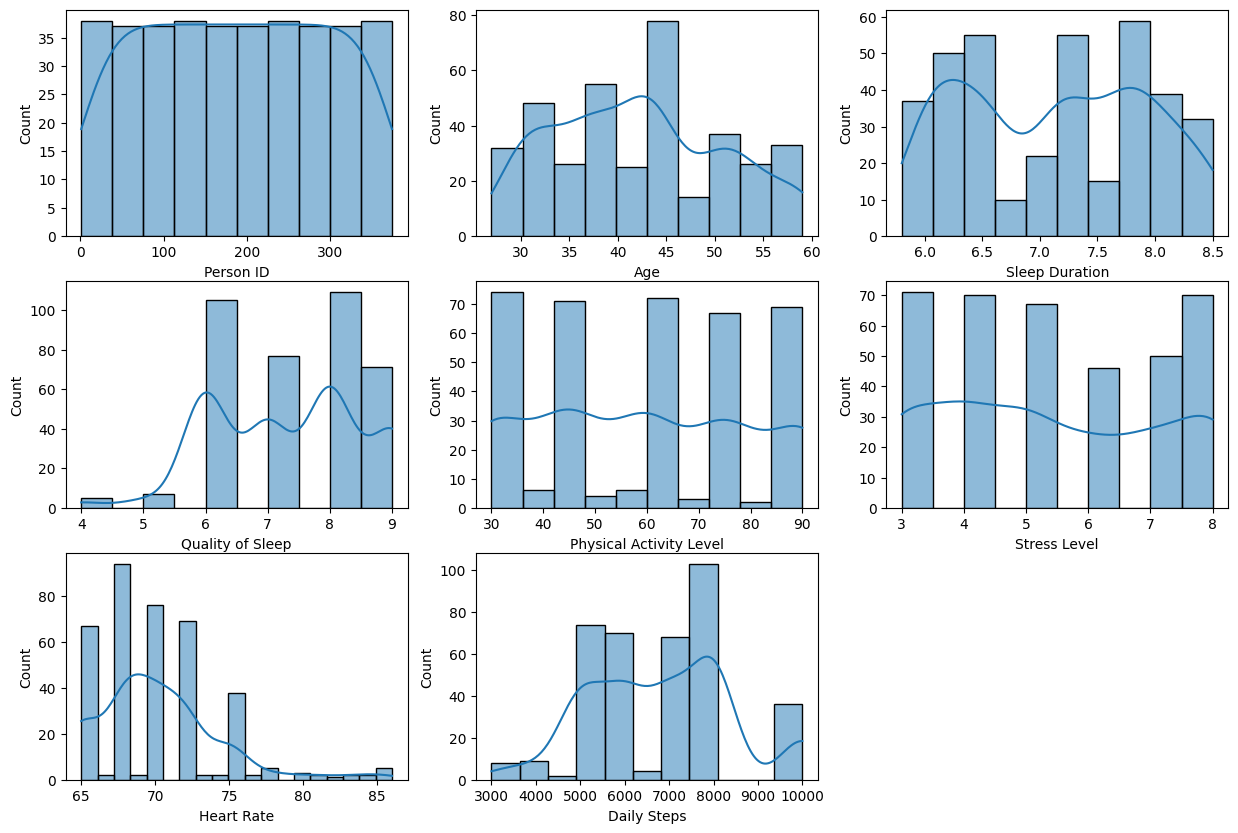

In [69]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True)

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

<Figure size 1500x1000 with 0 Axes>

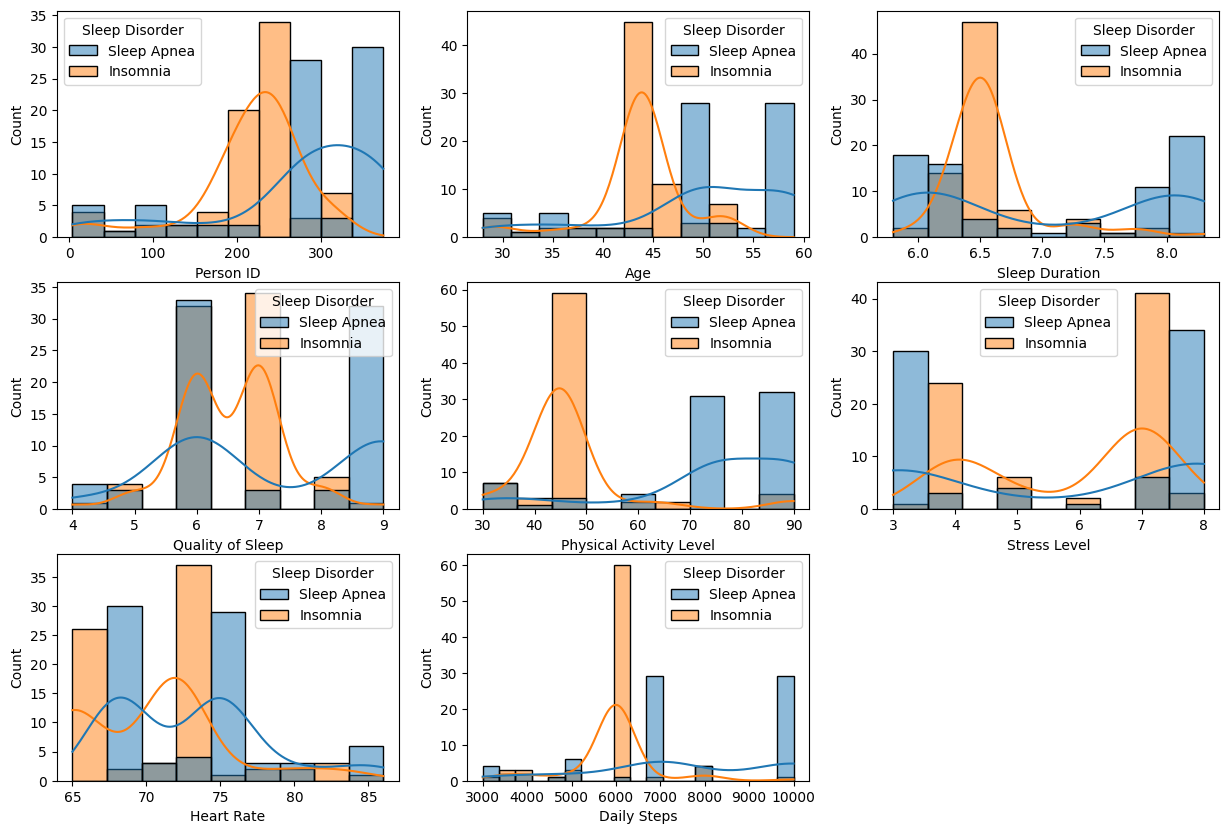

In [70]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True, hue='Sleep Disorder')

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

<Figure size 1500x1000 with 0 Axes>

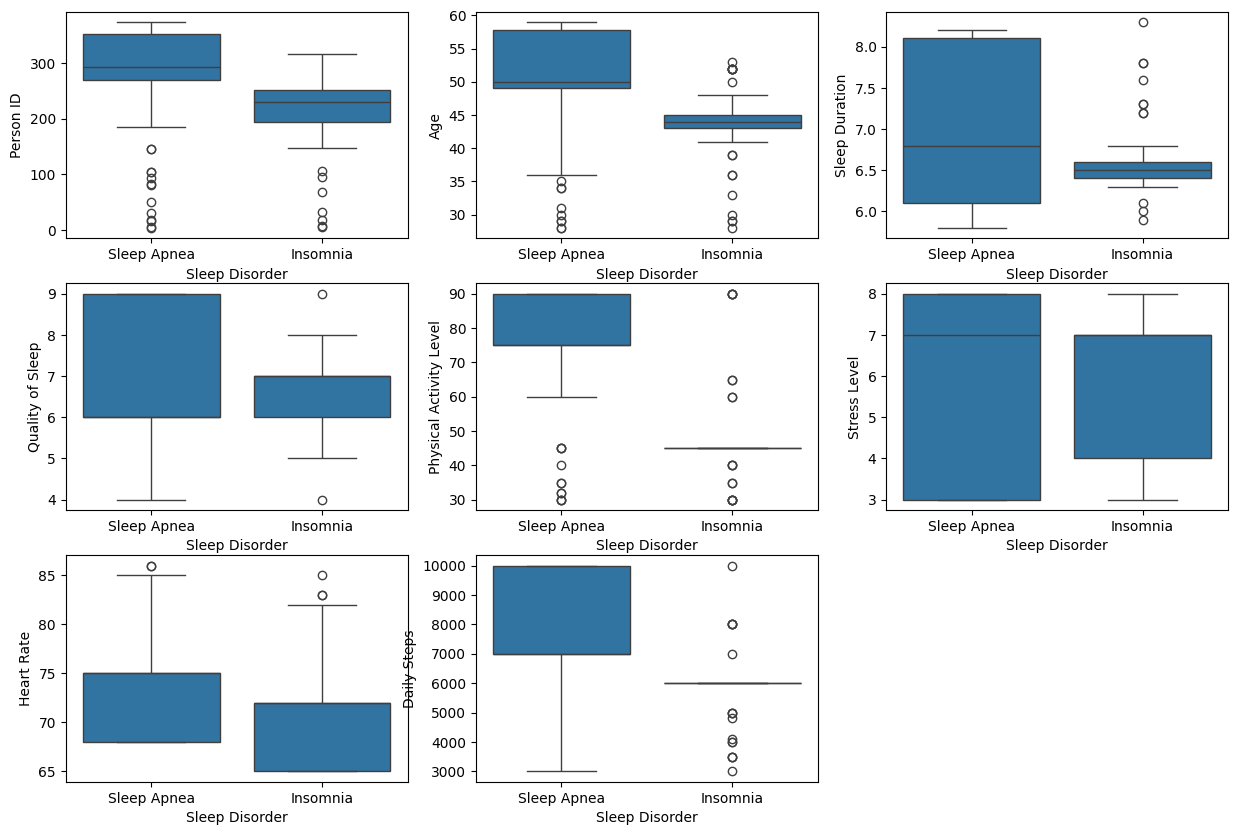

In [71]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x='Sleep Disorder', y=col, data=df, ax=axes[i])

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

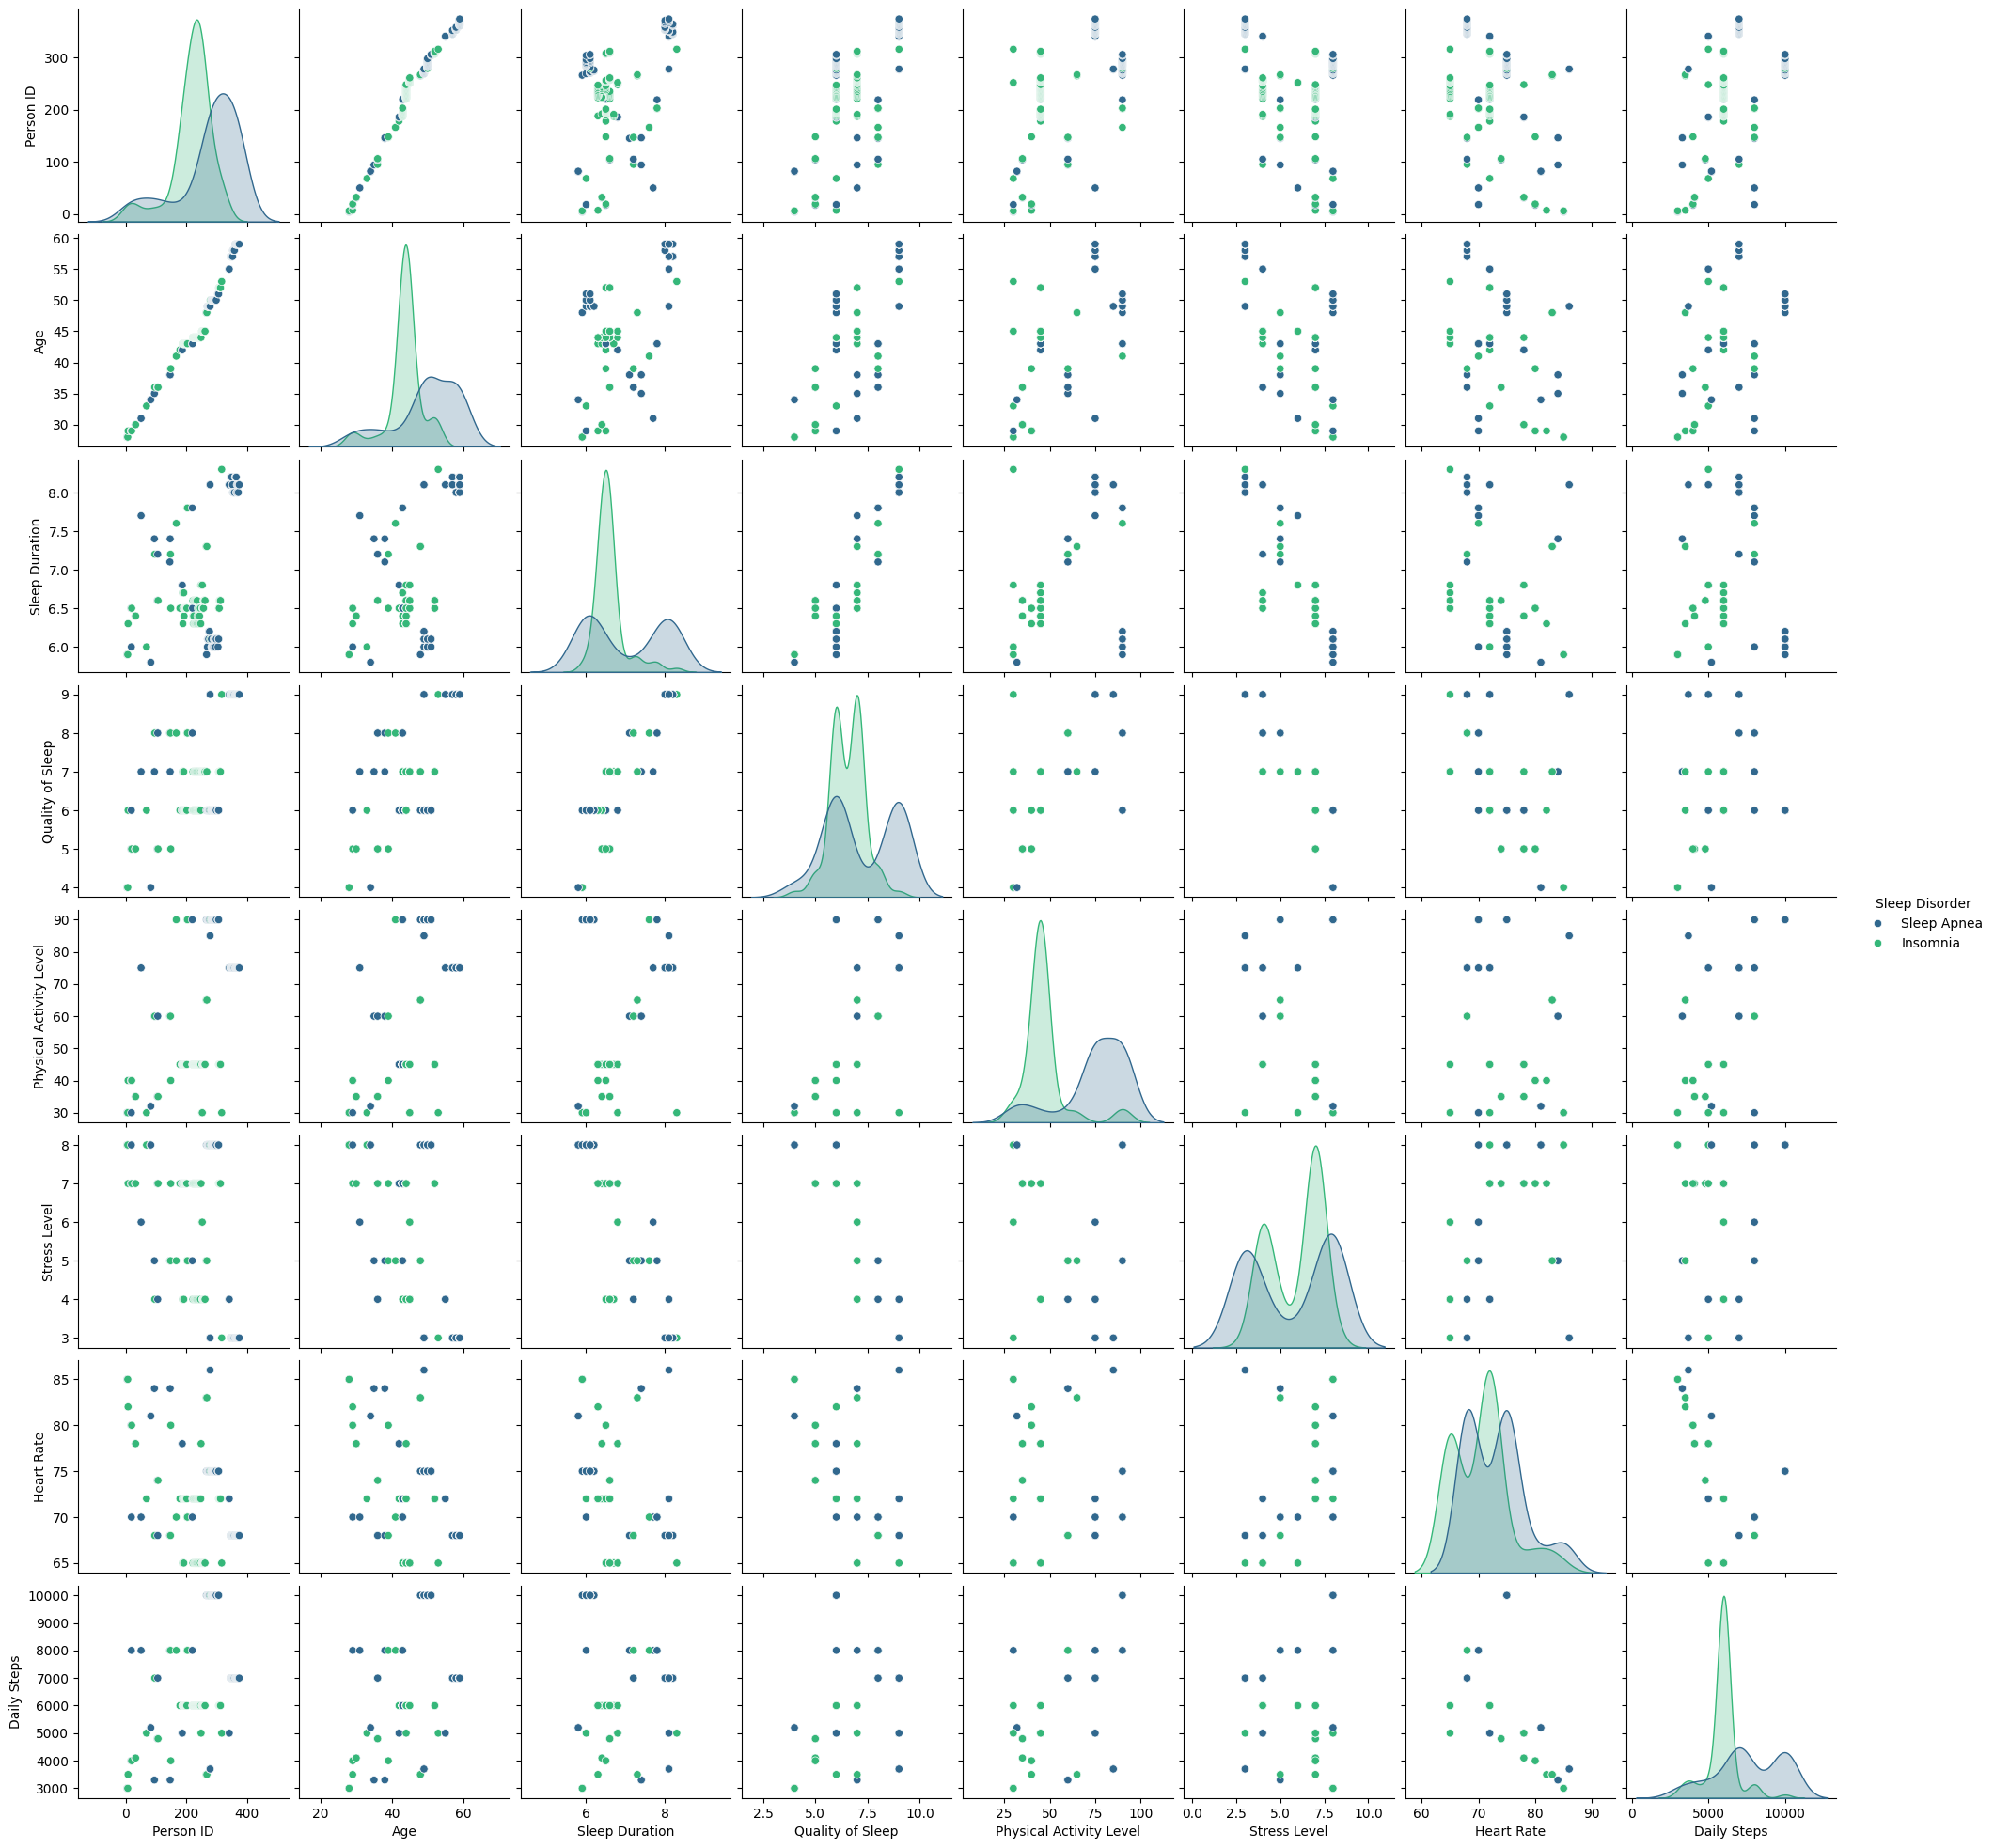

In [72]:
sns.pairplot(df, hue="Sleep Disorder", vars=numeric_features, palette="viridis")
plt.show()

<Figure size 1500x1000 with 0 Axes>

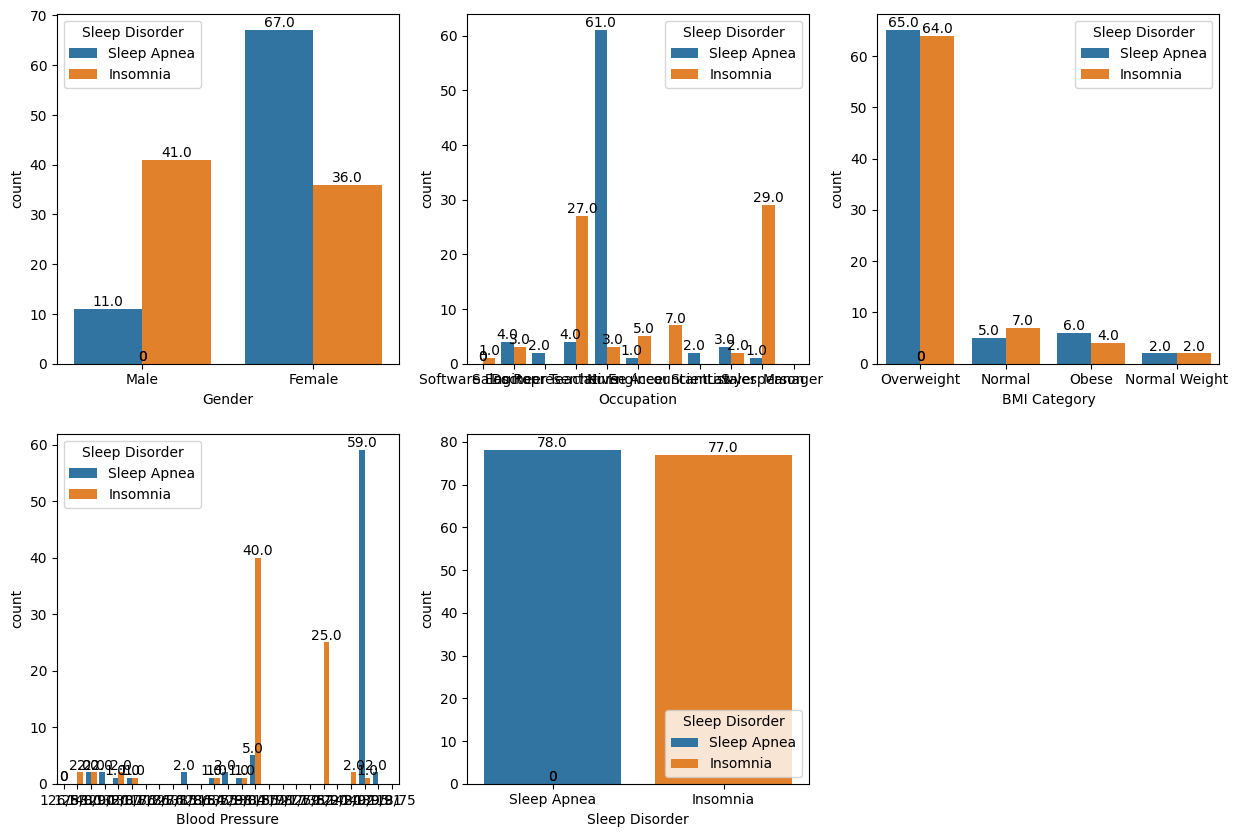

In [73]:
n = len(categorical_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df['Sleep Disorder'])

# Add labels to each bar
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [74]:
# Pisahkan "Blood Pressure" menjadi dua kolom
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Ubah ke tipe data integer
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')
df.drop(columns=['Person ID'], inplace=True)
# Hapus kolom lama jika tidak diperlukan
df.drop(columns=['Blood Pressure'], inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [75]:
le = LabelEncoder()
print('Data sebelum encoding :', df['Sleep Disorder'].value_counts(normalize=True))
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])
print('Data setelah encoding :', df['Sleep Disorder'].value_counts(normalize=True))

Data sebelum encoding : Sleep Disorder
Normal         0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: proportion, dtype: float64
Data setelah encoding : Sleep Disorder
1    0.585561
2    0.208556
0    0.205882
Name: proportion, dtype: float64


In [77]:
df.to_csv('sleep_data_cleaned.csv', index=False)